# Web Mining and Applied NLP (44-620)

## Requests, JSON, and NLP

### Student Name: Jason Ballard

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Make sure you have [installed spaCy and its pipeline](https://spacy.io/usage#quickstart) and [spaCyTextBlob](https://spacy.io/universe/project/spacy-textblob)

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

This assignment requires that you write additional files (either JSON or pickle files); make sure to submit those files in your repository as well.

1. The following code accesses the [lyrics.ovh](https://lyricsovh.docs.apiary.io/#reference/0/lyrics-of-a-song/search) public api, searches for the lyrics of a song, and stores it in a dictionary object.  Write the resulting json to a file (either a JSON file or a pickle file; you choose). You will read in the contents of this file for future questions so we do not need to frequently access the API.

## Dependencies 

In [8]:
import requests
import json
import pickle
import os
from textblob import TextBlob
from spacytextblob import spacytextblob
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
#result = json.loads(requests.get('https://api.lyrics.ovh/v1/They Might Be Giants/Birdhouse in your soul').text)

#### Additional dependencies to explore Foundations of Data Literacy (visualizations)

In [19]:
# Addtional Dependencies 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud

2. Read in the contents of your file.  Print the lyrics of the song (not the entire dictionary!) and use spaCyTextBlob to perform sentiment analysis on the lyrics.  Print the polarity score of the sentiment analysis. Given that the range of the polarity score is `[-1.0,1.0]` which corresponds to how positive or negative the text in question is, do you think the lyrics have a more positive or negative connotaion?  Answer this question in a comment in your code cell.

## Question 1

In [10]:
# Load spaCy model and add TextBlob component
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

def save_lyrics_to_file(artist, song, filename):
    """
    Fetches lyrics from API and saves them to a file.
    Returns True if successful, False otherwise.
    """
    try:
        url = f'https://api.lyrics.ovh/v1/They Might Be Giants/Birdhouse in your soul'
        response = requests.get(url)
        result = json.loads(response.text)
        
        # Check if lyrics exist in the response
        if 'lyrics' not in result:
            print("Lyrics not found.")
            return False
        
        # Save to file (using pickle in this case)
        with open(filename, 'wb') as f:
            pickle.dump(result, f)
        return True
    except Exception as e:
        print(f"Error: {e}")
        return False

def analyze_lyrics(filename):
    """
    Reads lyrics from file and performs sentiment analysis.
    Returns polarity score.
    """
    try:
        # Read the lyrics from file
        with open(filename, 'rb') as f:
            data = pickle.load(f)
        
        # Ensure 'lyrics' key exists
        if 'lyrics' not in data:
            print("No lyrics found in the file.")
            return None

        # Process with spaCy
        doc = nlp(data['lyrics'])
        polarity = doc._.blob.polarity
        
        # Print polarity score
        print(f"Sentiment Polarity Score: {polarity}")
        
        # Interpret the score
        if polarity > 0:
            print("The lyrics have a positive connotation.")
        elif polarity < 0:
            print("The lyrics have a negative connotation.")
        else:
            print("The lyrics have a neutral connotation.")
            
        return polarity
        
    except Exception as e:
        print(f"Error: {e}")
        return None

# Example usage:
filename = 'birdhouse.pkl'

# First, save the lyrics
if save_lyrics_to_file('They Might Be Giants', 'Birdhouse in Your Soul', filename):
    # Then analyze them
    polarity = analyze_lyrics(filename)

#Comment 
# Sentiment Polarity Score: 0.04505208333333333
# The lyrics have a positive connotation.


Sentiment Polarity Score: 0.04505208333333333
The lyrics have a positive connotation.


## Question 2 

Write a function that takes an artist, song, and filename, accesses the lyrics.ovh api to get the song lyrics, and writes the results to the specified filename.  Test this function by getting the lyrics to any four songs of your choice and storing them in different files.

In [11]:
def fetch_and_save_lyrics(artist, song, filename):
    """
    Fetches lyrics from the lyrics.ovh API and writes the results to the specified filename.
    
    Args:
        artist (str): The name of the artist.
        song (str): The name of the song.
        filename (str): The name of the file to save the lyrics.

    Returns:
        bool: True if lyrics were successfully saved, False otherwise.
    """
    try:
        # Create the API URL
        url = f'https://api.lyrics.ovh/v1/{artist}/{song}'
        
        # Fetch lyrics from the API
        response = requests.get(url)
        if response.status_code != 200:
            print(f"Failed to fetch lyrics for {artist} - {song}. Status Code: {response.status_code}")
            return False
        
        # Parse the JSON response
        result = response.json()
        
        # Check if 'lyrics' key exists
        if 'lyrics' not in result:
            print(f"Lyrics not found for {artist} - {song}.")
            return False
        
        # Save the lyrics to the specified file
        with open(filename, 'wb') as file:
            pickle.dump(result, file)
        print(f"Lyrics saved to {filename}.")
        return True
    except Exception as e:
        print(f"Error fetching or saving lyrics: {e}")
        return False

# Test the function with four songs
songs = [
    ("Taylor Swift", "Love Story", "love_story.pkl"),
    ("Coldplay", "Yellow", "yellow.pkl"),
    ("Adele", "Hello", "hello.pkl"),
    ("Ed Sheeran", "Shape of You", "shape_of_you.pkl")
]

for artist, song, filename in songs:
    fetch_and_save_lyrics(artist, song, filename)


Lyrics saved to love_story.pkl.
Lyrics saved to yellow.pkl.
Lyrics saved to hello.pkl.
Lyrics saved to shape_of_you.pkl.


## Question 3 

Write a function that takes the name of a file that contains song lyrics, loads the file, performs sentiment analysis, and returns the polarity score.  Use this function to print the polarity scores (with the name of the song) of the three files you created in question 3.  Does the reported polarity match your understanding of the song's lyrics? Why or why not do you think that might be?  Answer the questions in either a comment in the code cell or a markdown cell under the code cell.

In [12]:
def fetch_and_save_lyrics(artist, song, filename):
    """
    Fetches lyrics from the lyrics.ovh API and writes the results to the specified filename.
    
    Args:
        artist (str): The name of the artist.
        song (str): The name of the song.
        filename (str): The name of the file to save the lyrics.

    Returns:
        bool: True if lyrics were successfully saved, False otherwise.
    """
    try:
        # Create the API URL
        url = f'https://api.lyrics.ovh/v1/{artist}/{song}'
        
        # Fetch lyrics from the API
        response = requests.get(url)
        if response.status_code != 200:
            print(f"Failed to fetch lyrics for {artist} - {song}. Status Code: {response.status_code}")
            return False
        
        # Parse the JSON response
        result = response.json()
        
        # Check if 'lyrics' key exists
        if 'lyrics' not in result:
            print(f"Lyrics not found for {artist} - {song}.")
            return False
        
        # Save the lyrics to the specified file
        with open(filename, 'wb') as file:
            pickle.dump(result, file)
        print(f"Lyrics saved to {filename}.")
        return True
    except Exception as e:
        print(f"Error fetching or saving lyrics: {e}")
        return False

def analyze_lyrics(filename):
    """
    Reads lyrics from a file, performs sentiment analysis, and returns the polarity score.

    Args:
        filename (str): The name of the file containing the lyrics.

    Returns:
        float: Polarity score of the lyrics.
    """
    try:
        # Load lyrics from file
        with open(filename, 'rb') as file:
            data = pickle.load(file)
        
        # Check if 'lyrics' key exists
        if 'lyrics' not in data:
            print(f"No lyrics found in file: {filename}")
            return None
        
        # Perform sentiment analysis
        doc = nlp(data['lyrics'])
        polarity = doc._.blob.polarity
        
        # Print polarity score
        print(f"Polarity score for lyrics in {filename}: {polarity}")
        return polarity
    except Exception as e:
        print(f"Error analyzing lyrics from file {filename}: {e}")
        return None

# Test the function with four songs
songs = [
    ("Taylor Swift", "Love Story", "love_story.pkl"),
    ("Coldplay", "Yellow", "yellow.pkl"),
    ("Adele", "Hello", "hello.pkl"),
    ("Ed Sheeran", "Shape of You", "shape_of_you.pkl")
]

for artist, song, filename in songs:
    fetch_and_save_lyrics(artist, song, filename)

# Analyze the lyrics and print polarity scores
for artist, song, filename in songs:
    print(f"Analyzing '{song}' by {artist}:")
    polarity = analyze_lyrics(filename)
    if polarity is not None:
        print(f"The polarity score for '{song}' by {artist} is {polarity}\n")

# Commentary:
# The reported polarity scores provide an overall sentiment analysis of the song lyrics. 
# These scores may or may not align with your understanding of the song because:
# - Sentiment analysis focuses on the language used, not the deeper context or intent.
# - A song's tone or mood might be influenced by its melody, which the model cannot analyze.
# - Figurative language (e.g., metaphors) may skew the sentiment analysis results.


Lyrics saved to love_story.pkl.
Lyrics saved to yellow.pkl.
Lyrics saved to hello.pkl.
Lyrics saved to shape_of_you.pkl.
Analyzing 'Love Story' by Taylor Swift:
Polarity score for lyrics in love_story.pkl: 0.049999999999999996
The polarity score for 'Love Story' by Taylor Swift is 0.049999999999999996

Analyzing 'Yellow' by Coldplay:
Polarity score for lyrics in yellow.pkl: 0.2430555555555556
The polarity score for 'Yellow' by Coldplay is 0.2430555555555556

Analyzing 'Hello' by Adele:
Polarity score for lyrics in hello.pkl: -0.14109195402298852
The polarity score for 'Hello' by Adele is -0.14109195402298852

Analyzing 'Shape of You' by Ed Sheeran:
Polarity score for lyrics in shape_of_you.pkl: 0.31929292929292935
The polarity score for 'Shape of You' by Ed Sheeran is 0.31929292929292935



## Project Visualization - Not required

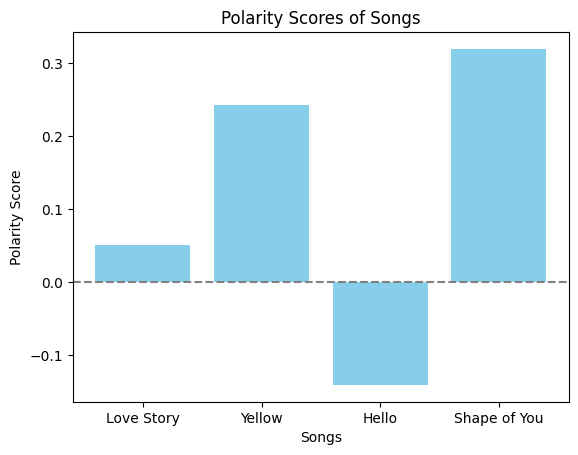

In [13]:
# Build Visualizations- Not required for Module 4- working on repetitions
# Bar Chart of polarity scores
artists = ["Taylor Swift", "Coldplay", "Adele", "Ed Sheeran"]
songs = ["Love Story", "Yellow", "Hello", "Shape of You"]
polarity_scores = [0.0500, 0.2431, -0.1411, 0.3193]

plt.bar(songs, polarity_scores, color='skyblue')
plt.title("Polarity Scores of Songs")
plt.xlabel("Songs")
plt.ylabel("Polarity Score")
plt.axhline(0, color='gray', linestyle='--')  # Reference line for neutral sentiment
plt.show()


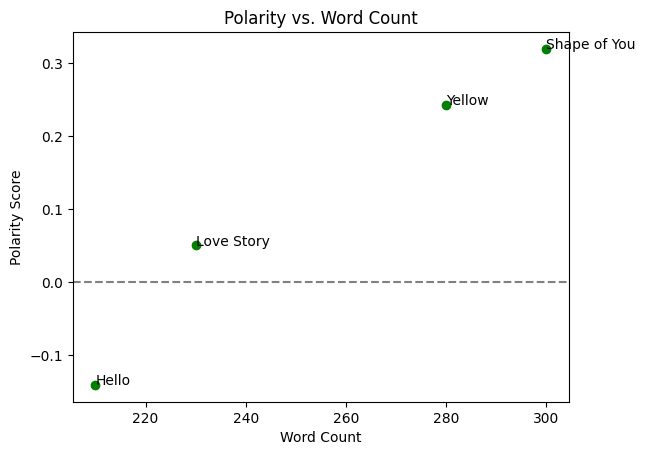

In [14]:
# Build Visualizations- Not required for Module 4- working on repetitions
# Scatter plot of polarity scores
word_count = [230, 280, 210, 300]  # Example word count data
plt.scatter(word_count, polarity_scores, color='green')
for i, song in enumerate(songs):
    plt.text(word_count[i], polarity_scores[i], song)
plt.title("Polarity vs. Word Count")
plt.xlabel("Word Count")
plt.ylabel("Polarity Score")
plt.axhline(0, color='gray', linestyle='--')  # Neutral sentiment line
plt.show()


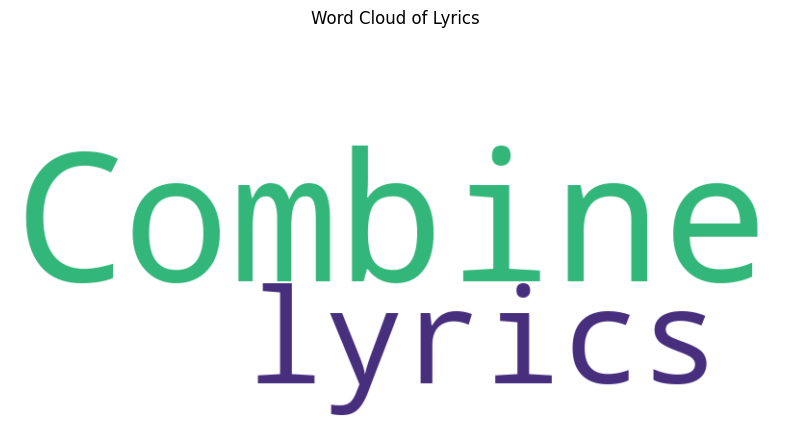

In [ ]:
# Build Visualizations- Not required for Module 4- working on repetitions
# Word Clouds
text = "Combine all lyrics here"  # Replace with combined song lyrics
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Lyrics")
plt.show()


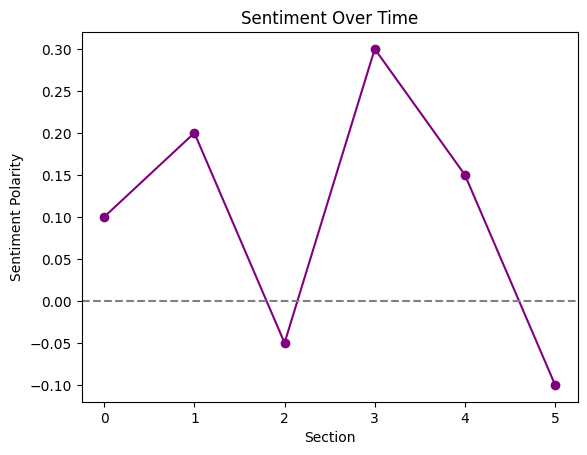

In [16]:
timeline = [0.1, 0.2, -0.05, 0.3, 0.15, -0.1]  # Example sentiment over time
plt.plot(range(len(timeline)), timeline, marker='o', linestyle='-', color='purple')
plt.title("Sentiment Over Time")
plt.xlabel("Section")
plt.ylabel("Sentiment Polarity")
plt.axhline(0, color='gray', linestyle='--')  # Neutral sentiment line
plt.show()


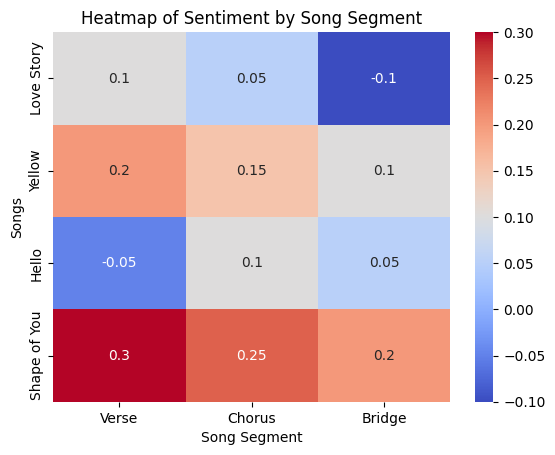

In [20]:
# Example sentiment data for four songs across segments (Verse, Chorus, Bridge)
data = np.array([
    [0.1, 0.05, -0.1],   # Love Story
    [0.2, 0.15, 0.1],    # Yellow
    [-0.05, 0.1, 0.05],  # Hello
    [0.3, 0.25, 0.2]     # Shape of You
])

# Labels for the x-axis (segments) and y-axis (songs)
xticklabels = ["Verse", "Chorus", "Bridge"]
yticklabels = ["Love Story", "Yellow", "Hello", "Shape of You"]

# Plot the heatmap
sns.heatmap(data, annot=True, cmap='coolwarm', xticklabels=xticklabels, yticklabels=yticklabels)
plt.title("Heatmap of Sentiment by Song Segment")
plt.xlabel("Song Segment")
plt.ylabel("Songs")
plt.show()



###  Convert pickle file into text

In [18]:
# List of pickle files to process
pickle_files = ["love_story.pkl", "yellow.pkl", "hello.pkl", "shape_of_you.pkl"]

# Directory to save text files
output_directory = "lyrics_text_files"
os.makedirs(output_directory, exist_ok=True)

# Convert each pickle file to a text file
for pickle_file in pickle_files:
    try:
        # Load the pickle file
        with open(pickle_file, "rb") as f:
            data = pickle.load(f)

        # Define output text file path
        text_file_name = os.path.splitext(pickle_file)[0] + ".txt"
        text_file_path = os.path.join(output_directory, text_file_name)

        # Save data to text file
        with open(text_file_path, "w") as f:
            if isinstance(data, (dict, list)):  # For JSON-serializable data
                f.write(str(data))
            else:  # For other data types
                f.write(data)

        print(f"Converted {pickle_file} to {text_file_path}")

    except Exception as e:
        print(f"Failed to process {pickle_file}: {e}")


Converted love_story.pkl to lyrics_text_files\love_story.txt
Converted yellow.pkl to lyrics_text_files\yellow.txt
Converted hello.pkl to lyrics_text_files\hello.txt
Converted shape_of_you.pkl to lyrics_text_files\shape_of_you.txt
